# Employee attrition prediction

In [33]:
# Run this cell before continuing.
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(GGally)
library(ggplot2)
install.packages("stargazer")
install.packages("skimr")
library(stargazer)
library(skimr)
library(dplyr)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



## 1. Data Description:

The HR Analytics dataset aims to understand and predict employee attrition in a corporate setting. It includes a range of employee attributes, such as age, job roles, work experience etc. This information enables HR departments to identify trends and implement proactive strategies to retain employees.

The columns in the dataset are:

| Variable Name            | Type        | Description                                                                                     |
|--------------------------|-------------|-------------------------------------------------------------------------------------------------|
| Age                      | Numeric     | Age of the employee                                                                             |
| Attrition                | Categorical | Employee attrition (Yes/No)                                                                     |
| BusinessTravel           | Categorical | Frequency of business travel (Non-Travel, Travel_Frequently, Travel_Rarely)                     |
| DailyRate                | Numeric     | Daily wage of the employee                                                                      |
| Department               | Categorical | Department of the employee (Sales, Research & Development, Human Resources)                     |
| DistanceFromHome         | Numeric     | Distance from home to work (in kilometers)                                                      |
| Education                | Categorical | Education level (1 = 'Below College', 2 = 'College', 3 = 'Bachelor', 4 = 'Master', 5 = 'Doctor')|
| EducationField           | Categorical | Field of education (Life Sciences, Other, Medical, Marketing, Technical Degree, Human Resources)|
| EmployeeCount            | Numeric     | Always 1 (not useful)                                                                           |
| EmployeeNumber           | Numeric     | Unique employee number (not useful)                                                             |
| EnvironmentSatisfaction  | Categorical | Satisfaction with the environment (1 = 'Low', 2 = 'Medium', 3 = 'High', 4 = 'Very High')        |
| Gender                   | Categorical | Gender of the employee (Male/Female)                                                            |
| HourlyRate               | Numeric     | Hourly rate of the employee                                                                     |
| JobInvolvement           | Categorical | Job involvement level (1 = 'Low', 2 = 'Medium', 3 = 'High', 4 = 'Very High')                    |
| JobLevel                 | Numeric     | Job level within the company (1 to 5)                                                           |
| JobRole                  | Categorical | Role of the employee (e.g., Sales Executive, Research Scientist)                                |
| JobSatisfaction          | Categorical | Job satisfaction level (1 = 'Low', 2 = 'Medium', 3 = 'High', 4 = 'Very High')                   |
| MaritalStatus            | Categorical | Marital status of the employee (Single, Married, Divorced)                                      |
| MonthlyIncome            | Numeric     | Monthly income of the employee                                                                  |
| MonthlyRate              | Numeric     | Monthly rate of the employee                                                                    |
| NumCompaniesWorked       | Numeric     | Number of companies the employee has worked for                                                 |
| Over18                   | Categorical | Always 'Yes' (not useful)                                                                       |
| OverTime                 | Categorical | Whether the employee works overtime (Yes/No)                                                    |
| PercentSalaryHike        | Numeric     | Percentage increase in salary                                                                   |
| PerformanceRating        | Categorical | Performance rating (1 = 'Low', 2 = 'Good', 3 = 'Excellent', 4 = 'Outstanding')                  |
| RelationshipSatisfaction | Categorical | Satisfaction with relationships (1 = 'Low', 2 = 'Medium', 3 = 'High', 4 = 'Very High')          |
| StandardHours            | Numeric     | Standard working hours (always 80, not useful)                                                  |
| StockOptionLevel         | Numeric     | Stock option level (0 to 3)                                                                     |
| TotalWorkingYears        | Numeric     | Total years of working                                                                          |
| TrainingTimesLastYear    | Numeric     | Number of training sessions attended last year                                                  |
| WorkLifeBalance          | Categorical | Work-life balance satisfaction (1 = 'Bad', 2 = 'Good', 3 = 'Better', 4 = 'Best')                |
| YearsAtCompany           | Numeric     | Number of years at the current company                                                          |
| YearsInCurrentRole       | Numeric     | Number of years in the current role                                                             |
| YearsSinceLastPromotion  | Numeric     | Number of years since the last promotion                                                        |
| YearsWithCurrManager     | Numeric     | Number of years with the current manager                                                        |



The original datasets are available here:

- https://www.kaggle.com/datasets/rishikeshkonapure/hr-analytics-prediction/data

In [34]:
HR <- read_csv("HR-Employee-Attrition.csv")

Rows: 1470 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Attrition, BusinessTravel, Department, EducationField, Gender, Job...
dbl (26): Age, DailyRate, DistanceFromHome, Education, EmployeeCount, Employ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### summary table for all columns in the HR dataset

In [35]:
summary(HR)

      Age         Attrition         BusinessTravel       DailyRate     
 Min.   :18.00   Length:1470        Length:1470        Min.   : 102.0  
 1st Qu.:30.00   Class :character   Class :character   1st Qu.: 465.0  
 Median :36.00   Mode  :character   Mode  :character   Median : 802.0  
 Mean   :36.92                                         Mean   : 802.5  
 3rd Qu.:43.00                                         3rd Qu.:1157.0  
 Max.   :60.00                                         Max.   :1499.0  
  Department        DistanceFromHome   Education     EducationField    
 Length:1470        Min.   : 1.000   Min.   :1.000   Length:1470       
 Class :character   1st Qu.: 2.000   1st Qu.:2.000   Class :character  
 Mode  :character   Median : 7.000   Median :3.000   Mode  :character  
                    Mean   : 9.193   Mean   :2.913                     
                    3rd Qu.:14.000   3rd Qu.:4.000                     
                    Max.   :29.000   Max.   :5.000              

In [36]:
num_observations <- nrow(HR)
num_variables <- ncol(HR)

# Extract variable types
variable_types <- sapply(HR, class)

variable_details <- data.frame(
  Type = variable_types
)

# Display number of observations, number of variables, and types of variables
cat("Number of Observations:", num_observations, "\n")
cat("Number of Variables:", num_variables, "\n")
print(variable_details)

Number of Observations: 1470 
Number of Variables: 35 
                              Type
Age                        numeric
Attrition                character
BusinessTravel           character
DailyRate                  numeric
Department               character
DistanceFromHome           numeric
Education                  numeric
EducationField           character
EmployeeCount              numeric
EmployeeNumber             numeric
EnvironmentSatisfaction    numeric
Gender                   character
HourlyRate                 numeric
JobInvolvement             numeric
JobLevel                   numeric
JobRole                  character
JobSatisfaction            numeric
MaritalStatus            character
MonthlyIncome              numeric
MonthlyRate                numeric
NumCompaniesWorked         numeric
Over18                   character
OverTime                 character
PercentSalaryHike          numeric
PerformanceRating          numeric
RelationshipSatisfaction   numeric


## 2. Question

*My question is: Given some explanatory variables — Age, DistanceFromHome, NumCompaniesWorked, WorkLifeBalance, TotalWorkingYears, and YearsInCurrentRole — can we predict whether or not the employee will leave the company?*


My question is focused on prediction, and it's predicting the employees' attrition based on some explanatory variables.

## 3. Exploratory Data Analysis and Visualization

In [37]:
head(HR)

Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,⋯,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,⋯,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,⋯,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,⋯,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,⋯,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,⋯,4,80,1,6,3,3,2,2,2,2
32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,⋯,3,80,0,8,2,2,7,7,3,6


In [38]:
dim(HR) # shape of the dataset is 1470 * 35

[1] 1470   35

In [39]:
sum(is.na(HR)) # there is no missing value, so don't need to remove na.

[1] 0

#### Remove some redundant columns

In [40]:
HR_data <- HR %>%
  select(-EmployeeCount, -Over18, -StandardHours, -EmployeeNumber)

dim(HR_data)

[1] 1470   31

#### Visualize boxplots

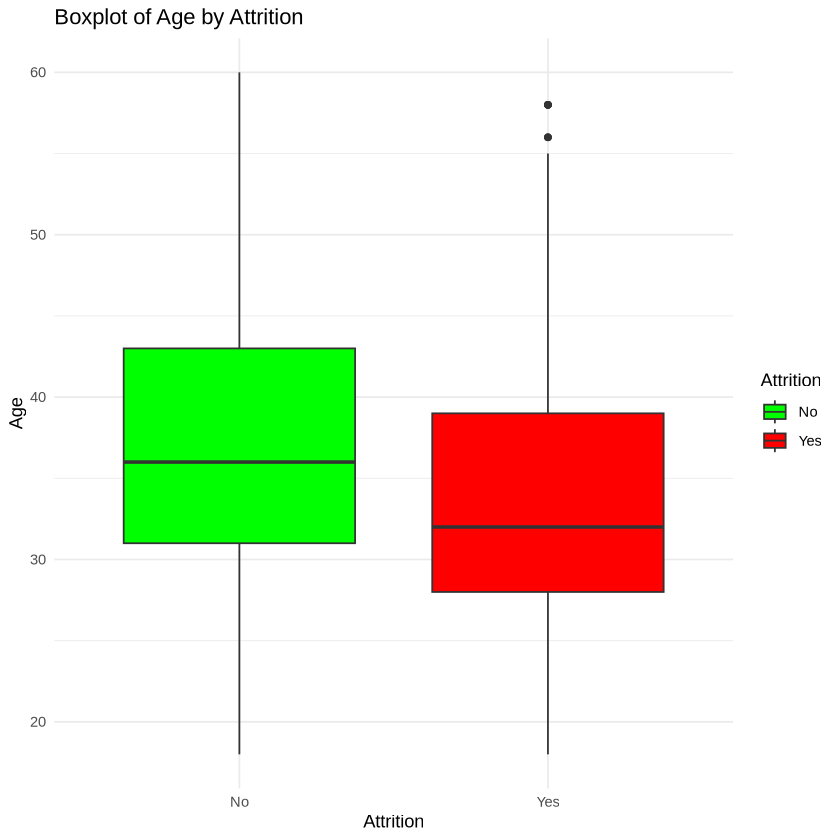

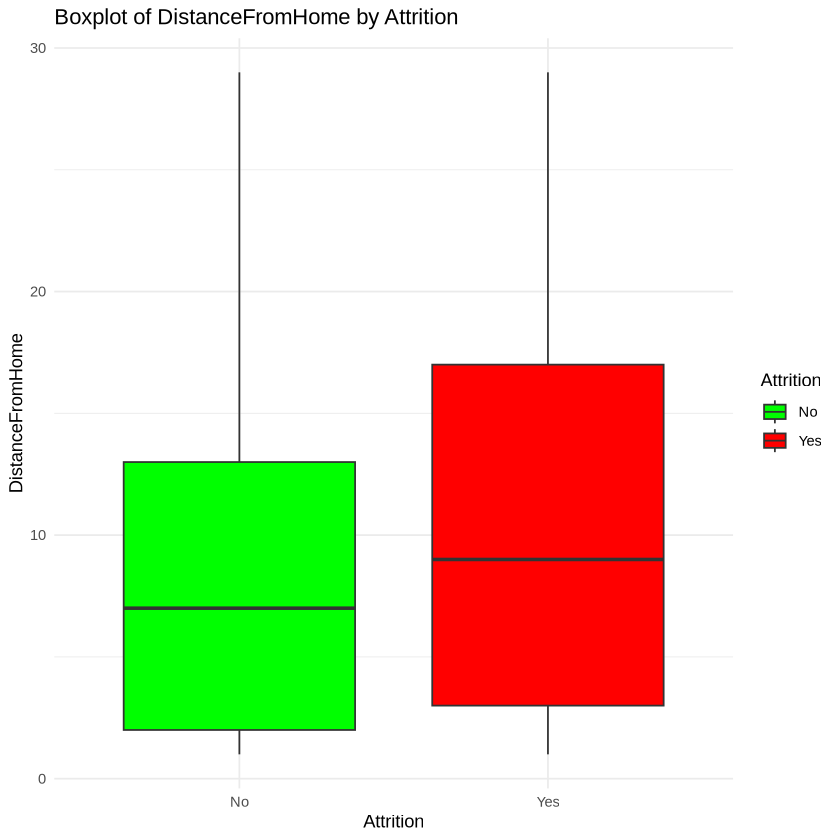

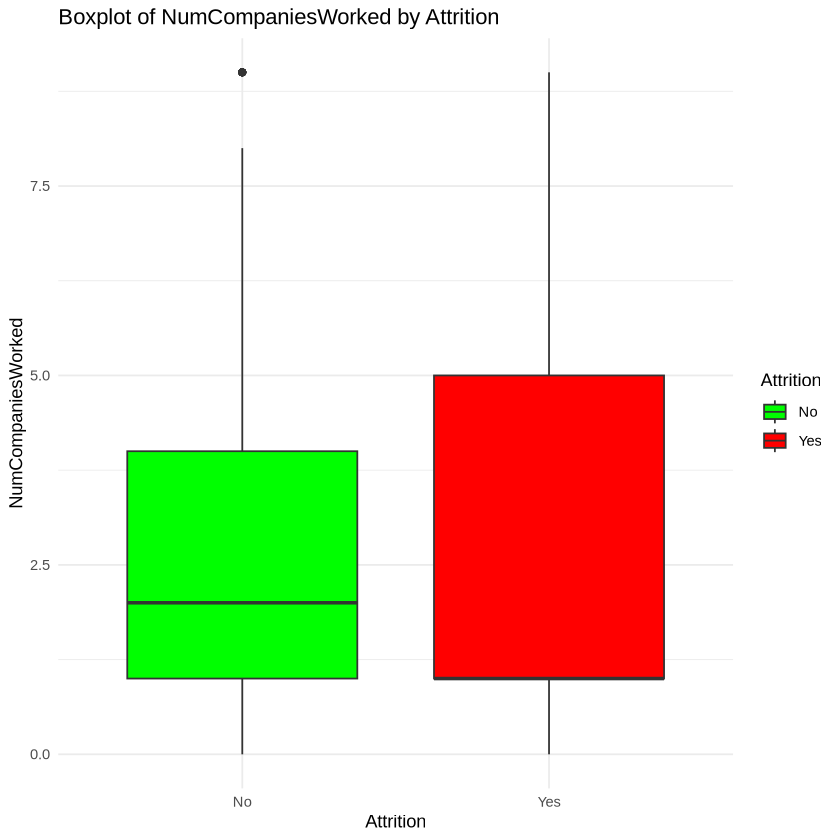

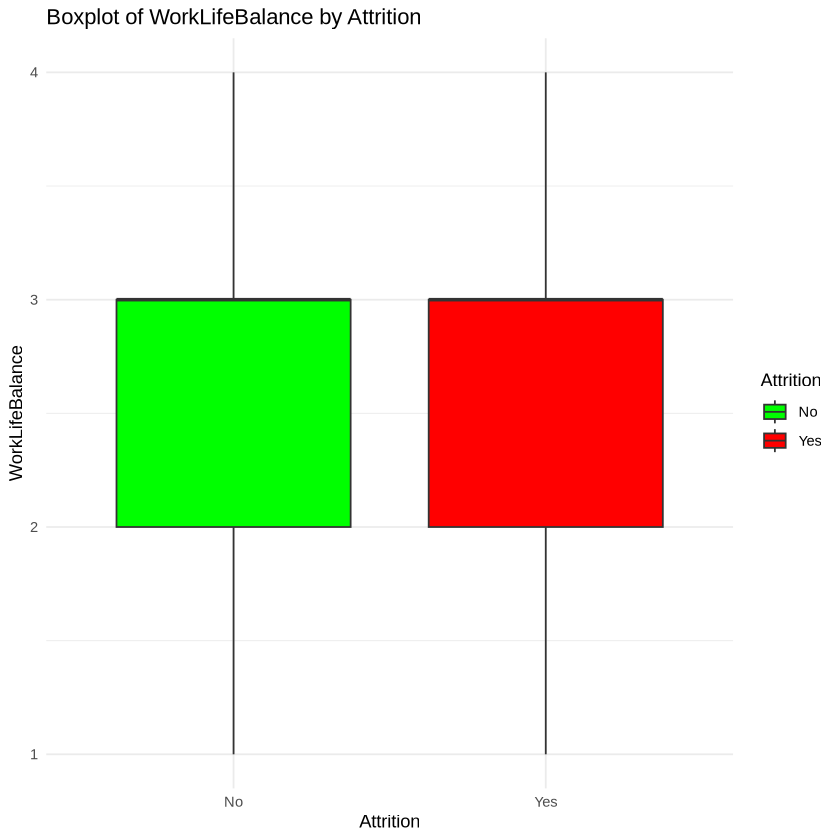

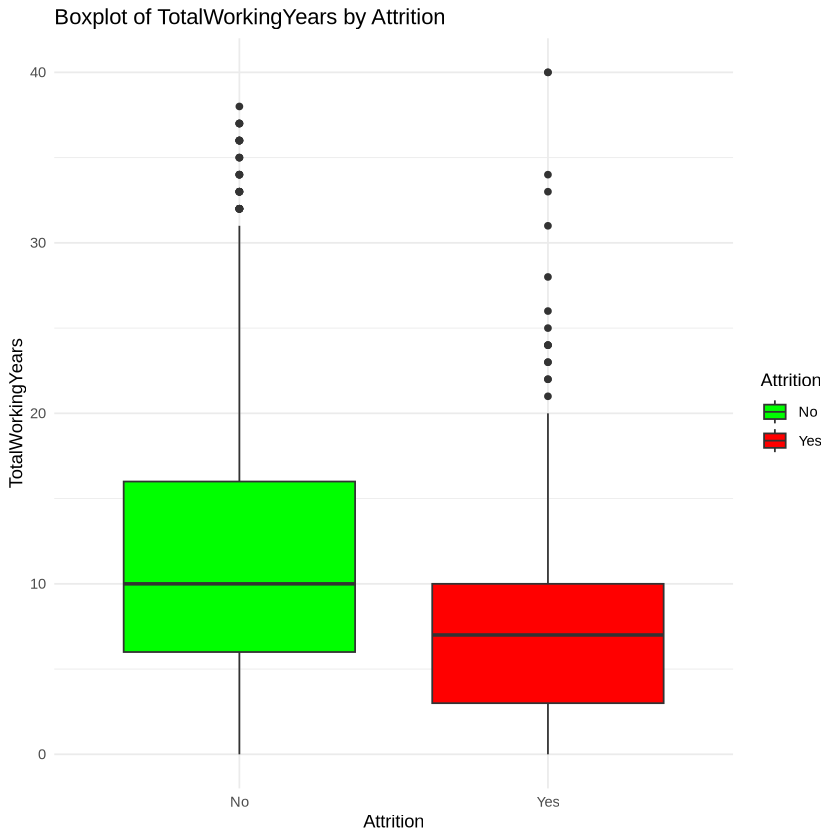

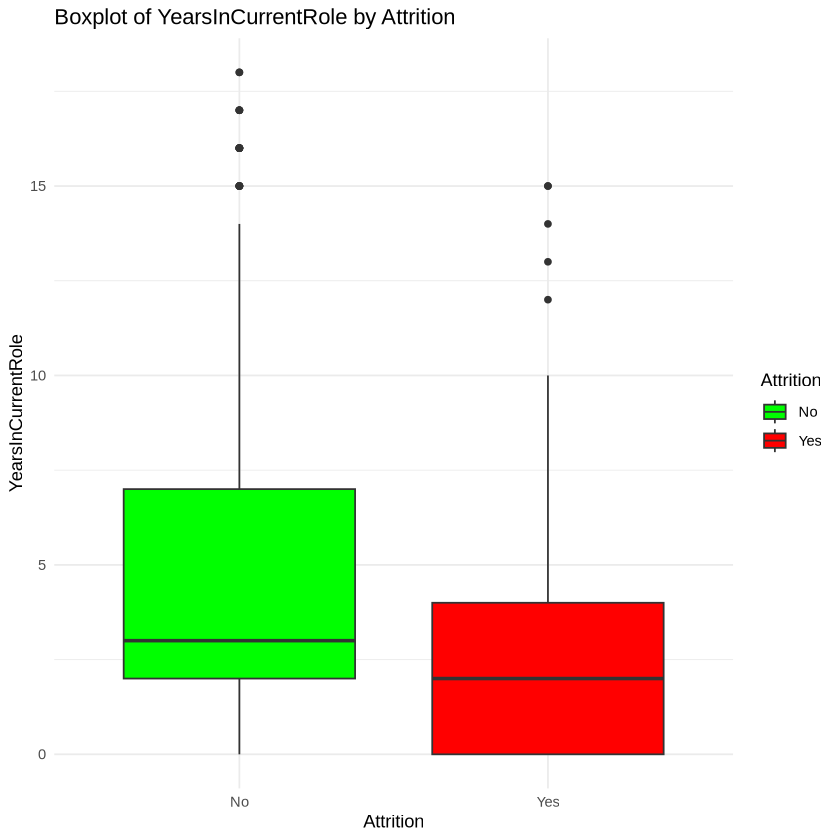

In [44]:
columns_to_plot <- c("Age", "DistanceFromHome", "NumCompaniesWorked", "WorkLifeBalance", "TotalWorkingYears", "YearsInCurrentRole")

plot_boxplot <- function(data, column) {
  ggplot(data, aes_string(x = "Attrition", y = column, fill = "Attrition")) +
    geom_boxplot() +
    labs(title = paste("Boxplot of", column, "by Attrition"), x = "Attrition", y = column) +
    theme_minimal() +
    scale_fill_manual(values = c("No" = "green", "Yes" = "red"))
}

for (col in columns_to_plot) {
  print(plot_boxplot(HR_data, col))
}

*I choose boxplots for visualization because they show the difference between two different attrition groups.*

Based on the plots above, boxplots with 'Age', 'DistanceFromHome', 'TotalWorkingYears', and 'YearsInCurrentRole' show more obvious difference between two attrition groups. Thus these variables might be good variables for the prediction.

## 4. Methods and Plan

My question is predicting attrition of employees based on some explanatory variables. I choose to use Logistic regression model. And I'm planning to use forward algorithm to choose the optimal explanatory variables.

#### Why is this method appropriate?
- The response variable is attrition, which is binary data. Logistic regression is suited for binary classification problems.
- In addition, we can understand the impact of explanatory variables based on the coefficients of the logistic regression model. This aligns well with the goal of not just predicting attrition, but also gaining insights into the factors contributing to it.

#### Which assumptions are required, if any, to apply the method selected?
- The log odds of the response variable are linearly related to the explanatory variables.
- The observations in the dataset should be independent of each other.


#### What are the potential limitations or weaknesses of the method selected?
- The assumption that the log odds of the outcome are linearly associated with the explanatory variables may not hold in practice. 
- Outliers might influence the logistic model.
- There might be some interaction term and logistic regression does not automatically account for interaction effects.